In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

No:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 22

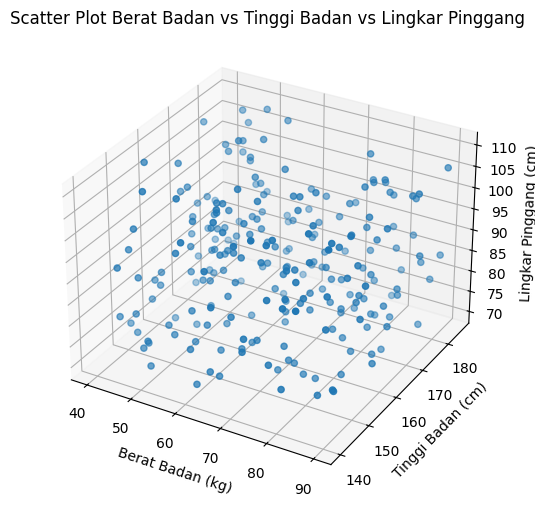

In [2]:
def baca_tabel_per_kolom(file_path):
    with open(file_path, "r", encoding="utf-8") as f:
        lines = [line.strip().split("\t") for line in f if line.strip()]

    # Ambil header
    header = lines[0]

    # Ambil data isi table
    data = lines[1:]

    # Buat dictionary untuk menampung list per kolom
    kolom = {h: [] for h in header}

    # Isi dictionary dengan data sesuai kolom
    for row in data:
        for i, h in enumerate(header):
            value = row[i]
            # kalau bisa di-cast ke int, jadikan int
            if value.isdigit():
                kolom[h].append(int(value))
            else:
                kolom[h].append(value)

    return kolom


# Main 
file_txt = "./dataset.txt"
hasil = baca_tabel_per_kolom(file_txt)

# Akses Setiap Kolom
print("No: ", hasil["No"])
print("Nama: ", hasil["Nama"])
print("Berat Badan: ", hasil["BeratBadan"])
print("Tinggi Badan: ", hasil["TinggiBadan"])
print("Lingkar Pinggang: ", hasil["LingkarPinggang"])
print("Tekanan Darah: ", hasil["TekananDarah"])

# Scatter Plot: Berat Badan vs Lingkar Pinggang
x = hasil["BeratBadan"]
y = hasil["TinggiBadan"]
z = hasil["LingkarPinggang"]

# Buat figure dan axis 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D
ax.scatter(x, y, z)

# Label axis
ax.set_xlabel("Berat Badan (kg)")
ax.set_ylabel("Tinggi Badan (cm)")
ax.set_zlabel("Lingkar Pinggang (cm)")

plt.title("Scatter Plot Berat Badan vs Tinggi Badan vs Lingkar Pinggang")
plt.show()

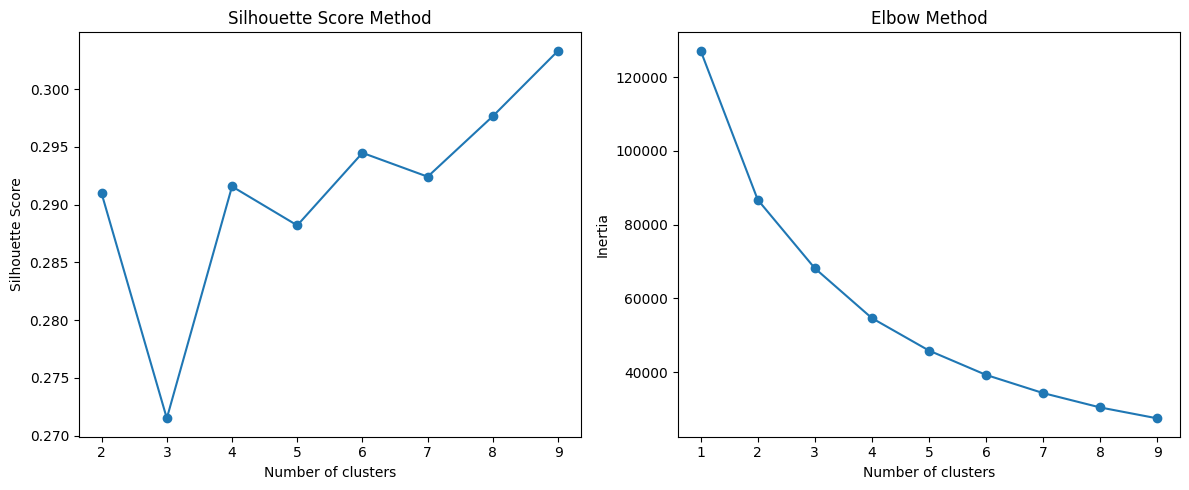

In [6]:
data = np.array(list(zip(x, y, z)))  # pastikan data array

silhouette_scores = []
inertias = []

# Silhouette (minimal cluster = 2)
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

# Elbow (mulai dari 1)
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

# --- Plot ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Silhouette
axs[0].plot(range(2, 10), silhouette_scores, marker='o')
axs[0].set_title('Silhouette Score Method')
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('Silhouette Score')

# Elbow
axs[1].plot(range(1, 10), inertias, marker='o')
axs[1].set_title('Elbow Method')
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Inertia')

plt.tight_layout()
plt.show()

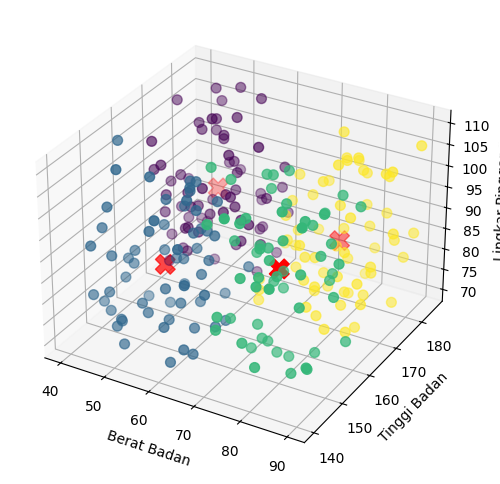

In [4]:
# Ambil 3 kolom
x = hasil["BeratBadan"]
y = hasil["TinggiBadan"]
z = hasil["LingkarPinggang"]

# Bikin array 3D
data = np.array(list(zip(x, y, z)))

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', s=200, marker='X')

ax.set_xlabel('Berat Badan')
ax.set_ylabel('Tinggi Badan')
ax.set_zlabel('Lingkar Pinggang')
plt.show()